<a href="https://colab.research.google.com/github/polivio/ML/blob/master/Hyperparameter%2Boptimization%2Bon%2Bsklearn%2Bwith%2BSMAC%2Band%2BGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use of hyperparameter optimization for choosing the best algorithm and hyperparameters for the KDD BR datasets.

In [0]:
# https://www.kaggle.com/c/kddbr-2019/data (KDD BR Author: Polivio)

# Hyperparameter optimization (reuse of Wang Chi) 

import numpy as np                    # for numerical computation
import pandas as pd                   # for data wrangling
import matplotlib.pyplot as plt       # for plotting
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# preprocessing # blob # raw
train = pd.read_csv('https://github.com/polivio/PEE/raw/master/Training_grouped.csv')
test = pd.read_csv('https://github.com/polivio/PEE/raw/master/Test_grouped.csv')


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 21 columns):
Unnamed: 0                          80000 non-null int64
traininglabelorder.scatterplotID    80000 non-null int64
qtde.ponto                          80000 non-null int64
Negative                            80000 non-null int64
Sample                              80000 non-null int64
mean.signalX                        80000 non-null float64
sd.signalX                          80000 non-null float64
var.signalX                         80000 non-null float64
kurtosis.signalX                    80000 non-null float64
skew.signalX                        80000 non-null float64
mean.signalY                        80000 non-null float64
sd.signalY                          80000 non-null float64
var.signalY                         80000 non-null float64
kurtosis.signalY                    80000 non-null float64
skew.signalY                        80000 non-null float64
L               

In [3]:
#train.isna().sum()
##X                            4592
##XY                          19463
##Y                            3711

# Dica Mateus substituição pela média
train['X'].fillna(train['X'].mean(),inplace=True)
train['XY'].fillna(train['XY'].mean(),inplace=True)
train['Y'].fillna(train['XY'].mean(),inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 21 columns):
Unnamed: 0                          80000 non-null int64
traininglabelorder.scatterplotID    80000 non-null int64
qtde.ponto                          80000 non-null int64
Negative                            80000 non-null int64
Sample                              80000 non-null int64
mean.signalX                        80000 non-null float64
sd.signalX                          80000 non-null float64
var.signalX                         80000 non-null float64
kurtosis.signalX                    80000 non-null float64
skew.signalX                        80000 non-null float64
mean.signalY                        80000 non-null float64
sd.signalY                          80000 non-null float64
var.signalY                         80000 non-null float64
kurtosis.signalY                    80000 non-null float64
skew.signalY                        80000 non-null float64
L               

In [4]:
train = train.loc[:,[#'qtde.ponto', 
       'mean.signalX', 'sd.signalX', 'kurtosis.signalX',
      'mean.signalY', 'sd.signalY', 
       'kurtosis.signalY', 'L', 'X', 'XY', 'Y',
       'mean.silhouette', 'traininglabelorder.score']]

## Quando iremos usar os dados de teste?
test = test.loc[:,[# 'qtde.ponto', 
       'mean.signalX', 'sd.signalX', 'kurtosis.signalX',
      'mean.signalY', 'sd.signalY', 
       'kurtosis.signalY', 'L', 'X', 'XY', 'Y',
       'mean.silhouette']]

train.head(20)

,mean.signalX,sd.signalX,kurtosis.signalX,mean.signalY,sd.signalY,kurtosis.signalY,L,X,XY,Y,mean.silhouette,traininglabelorder.score
0,3164.835616,804.757625,3.516731,1586.430137,568.651580,3.170632,4,92.0,269.000000,80.421065,0.840146,0.009647
1,1737.776042,944.798845,2.475172,2999.940104,1716.790542,2.195067,4,82.0,49.000000,249.000000,0.964427,0.842084
2,1139.621984,866.460225,1.922726,1836.640751,950.478945,1.436889,4,156.0,7.000000,206.000000,0.936210,0.744601
3,3609.692708,1808.877599,1.985210,2469.164062,1219.231193,1.913381,4,100.0,190.000000,90.000000,0.896070,0.842084
4,1867.203655,938.232021,2.176598,2180.908616,1515.205489,1.155226,4,176.0,2.000000,201.000000,0.952810,0.944177
5,449.072917,507.413489,29.834375,2910.351562,358.648637,7.460460,4,12.0,80.421065,368.000000,0.968487,1.000000
6,2076.953039,655.688216,2.774567,1170.375691,342.483082,2.222238,7,132.0,117.000000,106.000000,0.913787,0.578706
7,830.200000,648.128942,9.725987,3241.095000,693.599022,5.545654,5,3.0,22.000000,170.000000,0.916503,1.000000
8,3586.317708,1862.356219,2.630635,1683.195312,1436.342429,6.643115,4,326.0,80.421065,54.000000,0.956756,0.944319
9,222.168831,270.887643,23.916200,2146.623377,434.285275,4.516220,2,6.0,2.000000,144.000000,0.949731,0.751477


In [5]:
train.head(20)
# change the dtype to 'float64' 
train = train.astype('float64')
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
mean.signalX                80000 non-null float64
sd.signalX                  80000 non-null float64
kurtosis.signalX            80000 non-null float64
mean.signalY                80000 non-null float64
sd.signalY                  80000 non-null float64
kurtosis.signalY            80000 non-null float64
L                           80000 non-null float64
X                           80000 non-null float64
XY                          80000 non-null float64
Y                           80000 non-null float64
mean.silhouette             80000 non-null float64
traininglabelorder.score    80000 non-null float64
dtypes: float64(12)
memory usage: 7.3 MB


In [7]:
dados_nulos = train.isnull()
print(dados_nulos)

       mean.signalX  sd.signalX  ...  mean.silhouette  traininglabelorder.score
0             False       False  ...            False                     False
1             False       False  ...            False                     False
2             False       False  ...            False                     False
3             False       False  ...            False                     False
4             False       False  ...            False                     False
5             False       False  ...            False                     False
6             False       False  ...            False                     False
7             False       False  ...            False                     False
8             False       False  ...            False                     False
9             False       False  ...            False                     False
10            False       False  ...            False                     False
11            False       False  ...    

In [6]:
# feature qtde.ponto poderá ser removida??


X = np.array(train.drop(['traininglabelorder.score'], 1))

y = np.array(train['traininglabelorder.score'])


print(y)

[0.00964712 0.84208443 0.74460145 ... 0.8007374  0.00594233 0.7671597 ]


In [0]:
                                        # raw data should be organized
X_train, y_train, id_train, features_train = modify_data(["time"], "train")
X_test, y_test, id_test, features_test = modify_data(["time"], "test")
X_valid, y_valid, id_valid, features_valid = modify_data(["time"], "validate")
X_train, y_train, id_train = remove_outliers(X_train, y_train, id_train, 1000)

The outliers are: (array([ 168,  185,  604, 1024]),)


In [0]:
print(X_train.shape)
print(X_test.shape[0])
print(X_valid.shape[0])

Now, we load the necessary modules in order to build machine learning models. Most models belong to the scikit-learn package, except gradient boosted trees, where we recommend using xgboost.

We consider 5 popular regression models:
- Ridged linear regression
- Random Forest regression
- Gradient Boosting Tree regression
- Support Vector Regression
    - rbf kernel
    - linear kernel

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# preprocessing for SVR

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

We fix the random seed, and assert some prelimary parameters. We will be doing a 5-fold cross validation to measure the performance of a hyperparameter configuration (we will explain later). Also, SVR needs the feature datasets to be normalized.

In [0]:
num_folds = 5
seed = 1234
kfold = KFold(n_splits=num_folds, random_state=seed)

scoring = "neg_mean_squared_error"

# normalize the data X_train for svr (it is a must for svr!), linear and logistic regressions.
X_standard = StandardScaler()
sd_X_train = X_standard.fit_transform(X_train)
sd_X_test = X_standard.transform(X_test)
sd_X_valid = X_standard.transform(X_valid)

Ridged linear regression (denoted "linr"): It is the simplest model we consider. It only has one hyperparameter, alpha, which is the coefficient for the L2 penalty term in the MLE. Its hyperparameter space is the continuous interval [0.0, 100.0].

For details, see http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [0]:
estimators = {}
dict_spaces = {}

estimators["linr"] = (Ridge(solver = "svd"), ["alpha"])
dict_spaces["linr"] = {"alpha": [0.0, 100.0]}

Random Forest Regressor: This is a tree ensemble model, from which we identify the follwoing 4 hyperparameters. 4 is not a big number, and we can still explain the hyperparameters one by one:

- n_estimators is the number of trees in the ensemble, 
- max_features is the number of features considered when splitting a node in a tree.
- max_depth is the maximum depth of a tree.
- min_sample_split is the minimum number of data points a leave has to contain. 

The last three features constrain the expressiveness of the model, which help to avoid over-fittng. But if they are too small, then the model might not have enough capacity to regress the wafer thickness well. Usually, we hand tune these hyperparameters to adjust the model to the "right capacity". But we will apply hyperparameter optimization, which automatically tune the hyperparameters.

More details for random forest can be found here:

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [0]:
#eg Random Forest
estimators["rf"] = (RandomForestRegressor(), ["n_estimators", 
                                            "max_features",
                                            "max_depth",
                                            "min_samples_split"])
dict_spaces["rf"] = {"n_estimators": [10, 60], 
                     "max_features": ["auto", "sqrt", "log2", 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                     "max_depth" : [None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                     "min_samples_split" : [2, 10]}

Gradient boosted trees regressor: This is kinda close relative to random forest, but it requires more effort to tune the hyperparameters. There are quite a lot of hyperparameters, as listed. The details can be found here:

http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [0]:
#eg xgb.XGBRegressor, the sklearn interface for xgboost regressor
estimators["xgb"] = (XGBRegressor(), ["learning_rate",   
                                      "gamma",
                                      "max_depth",       
                                      "min_child_weight",                          
                                      "max_delta_step",
                                      "subsample", 
                                      "colsample_bytree",
                                      "colsample_bylevel",
                                      "reg_lambda",
                                      "reg_alpha", "n_estimators"])

dict_spaces["xgb"] = {"learning_rate": (10**-5, 10**0, "log-uniform"),   
                      "gamma": (0., 0.3),                          # gamma = min_split_loss
                      "max_depth":  (2, 8),                     
                      "min_child_weight":  (0., 3.),               # min_child_weight
                      "max_delta_step" :   (0., 0.),               # max_delta_step
                      "subsample":  (0.6, 1.0),                    # subsample
                      "colsample_bytree" :  (0.6, 1.0),            # colsample_bytree
                      "colsample_bylevel" : (0.6, 1.0),            # colsample_bylevel
                      "reg_lambda" :  (0., 10.0),                  # lambda
                      "reg_alpha" : (0., 2.0),                     
                      "n_estimators":  (50, 600)}                  # num_rounds in xgb

Finally, we come to suppor vector regression, which has few hyperparameters. But the hyperparameters "C" and "gamma" are very very important. Also, SVR requires normalized feature data.

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html

In [0]:
#eg Support Vector Regression with rbf kernel
estimators["svr_rbf"] =(SVR(kernel = "rbf"), ["C", "gamma", "epsilon"])
dict_spaces["svr_rbf"] = {"C": (10**-3, 10**4, "log-uniform"),   
                          "gamma": [10**-4, 10**-3.5, 10**-2, 10**-1.5, 10**-1, 10**-0.5, 1.0, 10**0.5, 10**1, "auto"], 
                          "epsilon": (0., 0.5)}                       

# Support Vector Regression with linear kernel
estimators["svr_lin"] = (LinearSVR(), ["C", "epsilon"])
dict_spaces["svr_lin"] = {"C": (10**-3, 10**4, "log-uniform"),   
                          "epsilon": (0., 0.5)}     

We code our hyperparameter tuning algorith below. It takes as an input a sklearn model and its hyperparameter space, and outputs a good set of hyperparameter configuration by training the model over n_calls carefully selected hyperparameter configs. These configs are usually selected in a sequential manner. 

We employ the following 3 hyperparameter optimization algorithms:

- random search
- gaussian process optimization 
- tree ensemble regression (when random forest is used, it is SMAC)

For small n_calls (say 10), these 3 algorithms roughly have the same performance. But gp and ensemble algorithms surpass random search when we have a moderate size n_calls (say 50). It is hard to say if gaussian process opt or tree ensemble is better, and my verdict is that they are roughly the same, at least when n_calls < 100. A survey on hyperparameter optimization can be found here:

https://www.cs.ox.ac.uk/people/nando.defreitas/publications/BayesOptLoop.pdf

We didnt include two other famous hyperparameter optimization algorithms, namely TPE and grid search. TPE kinda have similar performance to gp and tree ensemble, and we think we have enough number of hyperparameter optimization already. (We are using only one anyway). Grid search is only good when you are extremely experienced with the dataset and model, so experienced that you have a very small search space. Kagglers perform grid search on moderate size search spaces in order to get a 3rd or 4th digit improvement. But we don't think it is necessary here.

In [0]:
from skopt import dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
def auto_cv_score(estimator,
                  dict_space,
                  X, y, 
                  kfold = kfold, 
                  scoring = scoring, 
                  default = True,
                  hpo_optimizer = "dummy", 
                  n_calls = 11, 
                  n_random_starts = 10,
                  x0=None, y0=None, 
                  random_state=seed, 
                  verbose=False):
    """
        auto_cv_score aims to compute the best hyperparameter configuration for an
        sklearn classifer/regressor, by performing a cross validation on (X, y).
        It also works with xgboost.XGBClassifer or xgboost.XGBRegressor, which are 
        the sklearn wrappers for xgboost classifier and regressor. 
        
        TODO: sklearn wrapper for keras??        
        
        Input:
        - estimator is an ordered pair.
            -First entry is an sklearn estimator, (we assume that we can access each 
             hyperparameter through the estimator's attribute, namely 
             "estimator.hyperparamter")
            -Second entry is the ordered array of the hyperparameters in the estimator.
             It represents the desired order in the presentation of the hyperparameter 
             configuration.
             
        - dict_space is a dictionary.
            -Keys = hyperparameters' names
            -values = the respective ranges for the hyperparameters
            
        - X, y are the feature data and target data.
        
        - kfold is the k-fold cross validation set generated by 
          sklearn.model_selection.KFold:
            kfold = KFold(n_splits=num_folds, random_state=seed)
            
        - scoring is the sklearn metric used for measuring the error. By default, we use
          scoring = "neg_mean_squared_error". See sklearn.metric for more details.
          
        - default is True, if we evaluate the cv error first with the default hyperparameter
          config recommended by sklearn. default is False otherwise. It is recommended to 
          set it to be true, unless you are very sure on what you are doing.
          
        - hpo_optimizer is the hyperparameter optimizer we are using:
            - hpo_optimizer == "dummy" for using random search.
            - hpo_optimizer == "gp" for using gaussian process optimization.
            - hpo_optimzier == "gbrt" for using the gradient boosting trees variant of SMAC.
            - hpo_optimizer == "rf" for using SMAC.
            - hpo_optimzier == "et" for using the extra trees variaint of SMAC.
          In fact, the performance of the last four optimizers are kinda similar. 
          TODO: make hpo_optimizer == "gs" (grid search), and hpo_optimizer = "tpe", if
          there is a point in making these.
        
        - n_calls = number of hyperparameter evaluations
            - if default == True and hpo_optimzer != dummy, then n_calls must be \geq 11.
            - if default == False and hpo_optimzer != dummy, then n_calls must be \geq 10.
            - Otherwise, hpo_optimizer == dummy, and n_calls can be any positive integer.
            
        - x0 is the list of hyperparameter configs to test on before running our HPO, if 
          the corresponding y0 is empty. Otherwise, (x0, y0) serves as a warm start for 
          HPO.
          
        - random_state is the randome seed we are using.
              
            
        Output:
        - hpo_result: The result of the hyperparameter optimization.
        - cv_result: The mean and std of the cv score.
    """
    alg = estimator[0]
    order = estimator[1]
    name, space = dict_space.keys(), dict_space.values()
    if set(order)!=set(name):
        raise ValueError("The hyperparameters for the estimater and the hyperspace do not match.")
    idx = np.empty_like(order, dtype = "int")
    order = np.asarray(order)
    name = np.asarray(name)
    #space = np.asarray(space)
    for i in range(len(idx)):
        #the index INDEX in name where name[INDEX] = order[i] = i th hyperp in order.
        idx[i] = np.where(name==order[i])[0][0]
    ordered_space = []
    for i in range(len(idx)):
        ordered_space.append(space[idx[i]])
    if default:
        x_default = []
        for i in range(len(order)):
            x_default.append(getattr(alg, order[i]))
        if x0:
            x0 = [x_default] + x0
        else:
            x0 = x_default
    def cv_skopt(hp_vec):
        for i in range(len(order)): #key, value in hp_dict.items():
            setattr(alg, order[i], hp_vec[i])
        mse = cross_val_score(alg, X, y, cv = kfold, scoring = scoring)
        return -mse.mean() 
    if hpo_optimizer == "dummy":
        hpo_result = dummy_minimize(cv_skopt, ordered_space, n_calls = n_calls, 
                                x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    elif hpo_optimizer == "gp":
        hpo_result = gp_minimize(cv_skopt, ordered_space,
                                 n_calls = n_calls, n_random_starts = n_random_starts,
                             x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    elif hpo_optimizer == "gbrt":
        hpo_result = gbrt_minimize(cv_skopt, ordered_space, 
                                   n_calls = n_calls, n_random_starts = n_random_starts,
                             x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    elif hpo_optimizer == "rf":
        hpo_result = forest_minimize(cv_skopt, ordered_space, base_estimator='RF', 
                                     n_calls = n_calls, n_random_starts = n_random_starts,
                            x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    elif hpo_optimizer == "et":
        hpo_result = forest_minimize(cv_skopt, ordered_space, base_estimator='ET', 
                                     n_calls = n_calls, n_random_starts = n_random_starts,
                            x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    else:
        raise ValueError("The hpo_optimizer must be one of the followings: dummy, gp, gbrt, rf, et.")
    # compute the std for the cross validation under the selected hyperparameter.
    best_hp_vec = hpo_result.x
    for i in range(len(order)): #key, value in hp_dict.items():
        setattr(alg, order[i], best_hp_vec[i])
    mse = cross_val_score(alg, X, y, cv = kfold, scoring = scoring)
    cv_result = (hpo_result.fun, mse.std())
    return hpo_result, cv_result   

Now, we evaluate the performance of the listed models. We consider doing a brief hyperparameter optimization for each model, so that a model is not unfairly judged because of one bad configuration. The good thing about using sklearn model is that sklearn always recommends a default set of hyperparameter configuration for a model. We use this default configuration as the starting point for our HPO. 

In [0]:
alg_names = {"linr" : "Ridge Linear Regression",
             "rf" : "Random Forest",
             "xgb" : "Gradient Boosting Trees",
             "svr_rbf" : "SVR with rbf kernel",
             "svr_lin" : "SVR with linear kernel"}
def get_cv_results(n_calls = 15, 
                   n_random_starts = 5,
                   hpo_optimizer = "gp", 
                   estimators = estimators,
                   dict_spaces = dict_spaces, 
                   alg_names = alg_names,
                   X = X_train, sd_X = sd_X_train, y = y_train):
    hpo_results = {}
    cv_results = {}
    need_preproc = ["linr", "svr_rbf", "svr_lin"]
    for key in estimators.keys():
        if key in need_preproc:
            hpo_results[key], cv_results[key] = auto_cv_score(estimators[key], 
                                                              dict_spaces[key], 
                                                              X = sd_X, y =y, 
                                                              n_calls = n_calls,
                                                              n_random_starts = n_random_starts,
                                                              hpo_optimizer =  hpo_optimizer)
        else:
            hpo_results[key], cv_results[key] = auto_cv_score(estimators[key], 
                                                              dict_spaces[key], 
                                                              X = X, y =y, 
                                                              n_calls = n_calls, 
                                                              n_random_starts = n_random_starts,
                                                              hpo_optimizer =  hpo_optimizer)


        
    for key, value in cv_results.items():
        print("{algo}'s cv MSE: mean = {mean:7.3f} (std = {std:7.3f})" ).format(algo = alg_names[key],
                                                                                mean = value[0],
                                                                                std = value[1])
      
    return hpo_results, cv_results

The results for the cross validations are listed below. The mean and std arise from the randomness in cross validation.

In [0]:
hpo_results, cv_results = get_cv_results()

/home/astar/py2/py2/local/lib/python2.7/site-packages/skopt/optimizer/optimizer.py:203: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  cat_eq = np.all(x_arr[cat_inds] == next_x_arr[cat_inds])


Gradient Boosting Trees's cv MSE: mean =  13.049 (std =   2.016)
Random Forest's cv MSE: mean =  15.338 (std =   4.583)
SVR with rbf kernel's cv MSE: mean =  44.311 (std =  20.466)
SVR with linear kernel's cv MSE: mean =  80.038 (std =  99.001)
Ridge Linear Regression's cv MSE: mean =  35.003 (std =   8.359)


Looks like gradient boosting tree is the best so far, but random forest is not that bad also. Surprisingly, Ridge linear regression is better than SVR. Now let's take a closer look on the hyperparameter tunning processes.

We plot the convergence of the HPO in the following 3 plots. It could look like the improvement is small...

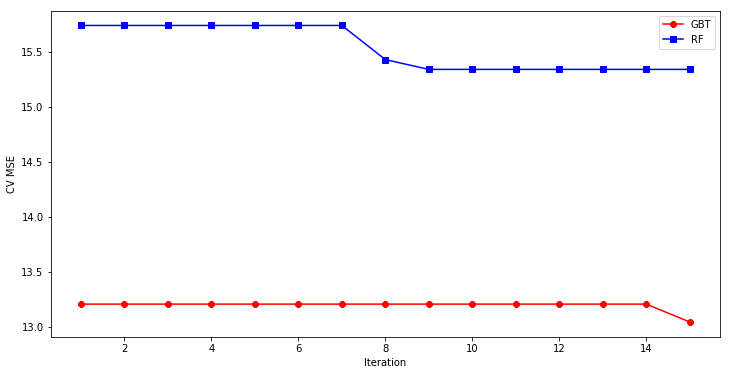

In [0]:
t = np.arange(1, 16, 1)
def perf_min(lst):
    lst_min = []
    for i in range(len(lst)):
        lst_min.append(np.min(lst[:(i+1)]))
    lst_min = np.asarray(lst_min)
    return lst_min

perf={}
for key, item in hpo_results.items():
    perf[key] = perf_min(item.func_vals)
# red dashes, blue squares and green triangles
plt.figure(figsize=(12,6))
plt.plot(t, perf["xgb"], 'r8-', label = "GBT")
plt.plot(t, perf["rf"], 'bs-', label = "RF")
plt.xlabel("Iteration")
plt.ylabel("CV MSE")
plt.legend()
plt.show()

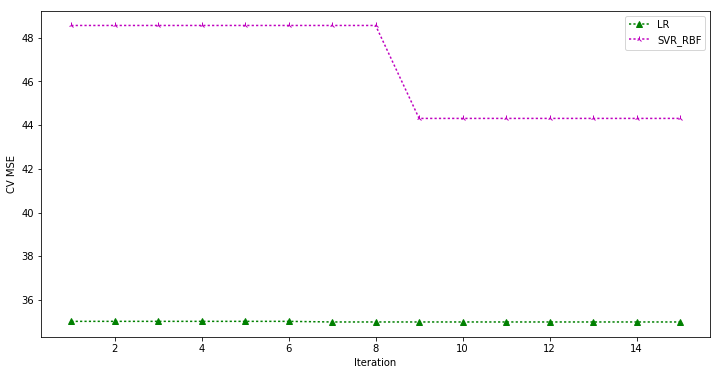

In [0]:
plt.figure(figsize=(12,6))
plt.plot(t, perf["linr"], 'g^:', label = "LR")
plt.plot(t, perf["svr_rbf"], "m2:", label = "SVR_RBF")
plt.xlabel("Iteration")
plt.ylabel("CV MSE")
plt.legend()
plt.show()

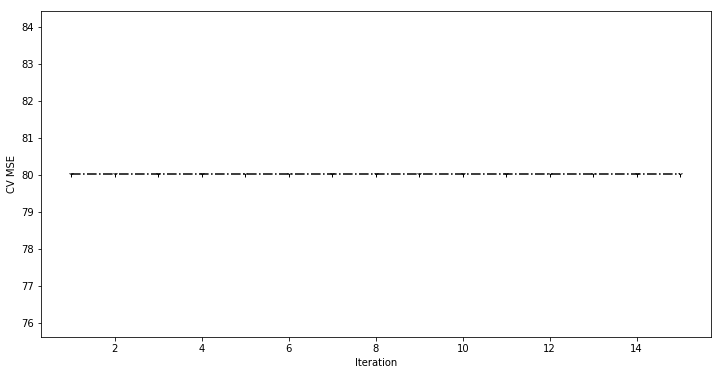

In [0]:
plt.figure(figsize=(12,6))
plt.plot(t, perf["svr_lin"], "k1-.")
plt.xlabel("Iteration")
plt.ylabel("CV MSE")
plt.legend()
plt.show()

If we look at the cv values during the HPO for each algorithms, we witness that there are quite a lot of fluctuation, and it is not straightforward to find hp config that beats the default hp config (the default's cv value is the first entry)

In [0]:
print("Random Forest's cv values during HPO:")
print(hpo_results["rf"].func_vals)
print("-------------------------------\n")
print("Gradient Boosting Trees's cv values during HPO:")
print(hpo_results["xgb"].func_vals)
print("-------------------------------\n")
print("Ridged Linear Regression's cv values during HPO:")
print(hpo_results["linr"].func_vals)
print("-------------------------------\n")
print("SVR (RBF)'s cv values during HPO:")
print(hpo_results["svr_rbf"].func_vals)
print("-------------------------------\n")
print("SVR (linear)'s cv values during HPO:")
print(hpo_results["svr_lin"].func_vals)
print("-------------------------------\n")

Random Forest's cv values during HPO:
[ 15.73616185  16.05607953  16.06705268  23.66464511  19.41560517
  60.16747199  19.31377462  15.42660422  15.33801609  15.57829866
  19.40809196  15.73757752  15.61385822  15.47838575  15.74637834]
-------------------------------

Gradient Boosting Trees's cv values during HPO:
[   13.21070919  8313.75641223  4593.48883657  8777.66515427  5143.68985288
  8781.94150632    13.21070919    13.42056323    13.40763469    13.34246484
    13.40740184    13.51279207    13.49718591    13.3428335     13.04877033]
-------------------------------

Ridged Linear Regression's cv values during HPO:
[ 35.03118184  49.13749051  36.06772057  38.11438471  35.33207604
  35.3476264   35.00259731  35.01003685  35.09894886  35.00259777
  35.00274645  35.00318818  35.00285404  35.00437912  35.0043692 ]
-------------------------------

SVR (RBF)'s cv values during HPO:
[   48.56165431  1019.39160837   921.69505223  1018.83693862   147.13617409
   924.90904458    52.0521679

Let's perform 50 additional iterations for our HPO. We use gaussian processes as our HP optimizers. It takes about 20 minutes for the computation below.

In [0]:
# takes ~ 20 minutes...
estimators["rf"] = (RandomForestRegressor(), ["n_estimators", 
                                            "max_features",
                                            "max_depth",
                                            "min_samples_split"])

further_rf_hpo = auto_cv_score(estimators["rf"],
                               dict_spaces["rf"],
                               X_train, y_train, 
                               kfold = kfold, 
                               scoring = scoring, 
                               default = False,
                               hpo_optimizer = "gp", 
                               n_calls = 50, 
                               n_random_starts = 0,
                               x0=hpo_results["rf"].x_iters, 
                               y0=hpo_results["rf"].func_vals, 
                               random_state=seed, 
                               verbose=False)

estimators["xgb"] = (XGBRegressor(), ["learning_rate",   
                                      "gamma",
                                      "max_depth",       
                                      "min_child_weight",                          
                                      "max_delta_step",
                                      "subsample", 
                                      "colsample_bytree",
                                      "colsample_bylevel",
                                      "reg_lambda",
                                      "reg_alpha", "n_estimators"])

further_xgb_hpo = auto_cv_score(estimators["xgb"],
                               dict_spaces["xgb"],
                               X_train, y_train, 
                               kfold = kfold, 
                               scoring = scoring, 
                               default = False,
                               hpo_optimizer = "gp", 
                               n_calls = 50, 
                               n_random_starts = 0,
                               x0=hpo_results["xgb"].x_iters, 
                               y0=hpo_results["xgb"].func_vals, 
                               random_state=seed, 
                               verbose=False)

/home/astar/py2/py2/local/lib/python2.7/site-packages/skopt/optimizer/optimizer.py:208: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Let's take a look at the best hyperparameter configurations we have obtained so far:

In [0]:
best_rf = dict(zip(estimators["rf"][1], further_rf_hpo[0].x))
best_xgb = dict(zip(estimators["xgb"][1], further_xgb_hpo[0].x))
print("Our best hyperparameter configuration for random forest is")
for key, item in best_rf.items():
    print(key + ": " + str(item))
print("-------------------------------------------------------------")
print("Our best hyperparameter configuration for gradient boosting is")
for key, item in best_xgb.items():
    print(key + ": " + str(item))

Our best hyperparameter configuration for random forest is
n_estimators: 60
max_features: 0.4
min_samples_split: 2
max_depth: None
-------------------------------------------------------------
Our best hyperparameter configuration for gradient boosting is
reg_alpha: 0.948766094664
colsample_bytree: 0.819748481326
colsample_bylevel: 0.845517728008
learning_rate: 0.0849090680093
max_delta_step: 0.0
min_child_weight: 2.37764760709
n_estimators: 488
subsample: 0.685707865
reg_lambda: 1.9297111035
max_depth: 4
gamma: 0.218106329892


We witness the following convergence:

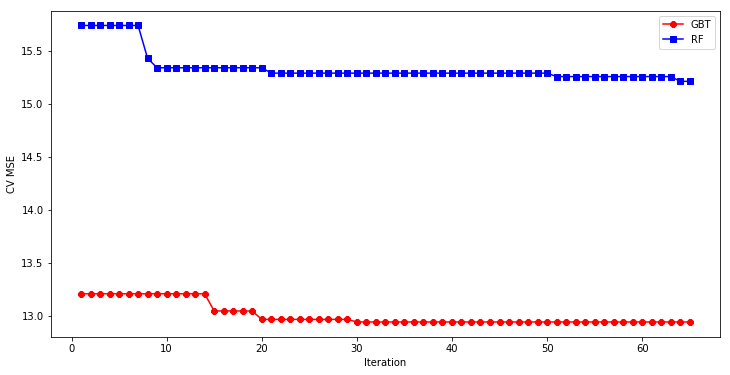

In [0]:
final_xgb = perf_min(np.asarray(further_xgb_hpo[0].func_vals))
final_rf = perf_min(np.asarray(further_rf_hpo[0].func_vals))
tt = np.arange(1, 66, 1)

plt.figure(figsize=(12,6))
plt.plot(tt, final_xgb, 'r8-', label = "GBT")
plt.plot(tt, final_rf, 'bs-', label = "RF")
plt.xlabel("Iteration")
plt.ylabel("CV MSE")
plt.legend()
plt.show()

Finally, we evaluate the performance of our tuned GBT and RF on the test and validation datasets.

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# define the models with our best hyperparameters.
best_rf_model = RandomForestRegressor(**best_rf)
best_xgb_model = XGBRegressor(**best_xgb)
# fit the xgb and rf with the whole of training dataset.
best_rf_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)
# predict
y_rf_test = best_rf_model.predict(X_test)
y_rf_valid = best_rf_model.predict(X_valid)
y_xgb_test = best_xgb_model.predict(X_test)
y_xgb_valid = best_xgb_model.predict(X_valid)
# the MSEs
xgb_test_mse = mean_squared_error(y_xgb_test, y_test)
xgb_test_mae = mean_absolute_error(y_xgb_test, y_test)
xgb_valid_mse = mean_squared_error(y_xgb_valid, y_valid)
xgb_valid_mae = mean_absolute_error(y_xgb_valid, y_valid)
rf_test_mse = mean_squared_error(y_rf_test, y_test)
rf_test_mae = mean_absolute_error(y_rf_test, y_test)
rf_valid_mse = mean_squared_error(y_rf_valid, y_valid)
rf_valid_mae = mean_absolute_error(y_rf_valid, y_valid)
# print out
print("On the training set: ")
print("GBT has cv MSE " + str(13))
print("Random Forest has cv MSE " + str(15.25))
print("-------------------------------------------")
print("On the test set: ")
print("GBT has MSE " + str(xgb_test_mse))
print("GBT has MAE " + str(xgb_test_mae))
print("Random Forest has MSE " + str(rf_test_mse))
print("Random Forest has MAE " + str(rf_test_mae))
print("-------------------------------------------")
print("On the validation set: ")
print("GBT has MSE " + str(xgb_valid_mse))
print("GBT has MAE " + str(xgb_valid_mae))
print("Random Forest has MSE " + str(rf_valid_mse))
print("Random Forest has MAE " + str(rf_valid_mae))

On the training set: 
GBT has cv MSE 13
Random Forest has cv MSE 15.25
-------------------------------------------
On the test set: 
GBT has MSE 11.1693288366
GBT has MAE 2.5768468448
Random Forest has MSE 12.1476106446
Random Forest has MAE 2.61338905759
-------------------------------------------
On the validation set: 
GBT has MSE 11.552476739
GBT has MAE 2.54867379054
Random Forest has MSE 11.0687909462
Random Forest has MAE 2.5090241591


Here is the code for performing HPO, in the case when you are given a training and a test dataset.

In [0]:
from sklearn.metrics import mean_squared_error
from skopt import dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
def auto_validate(estimator, 
                  dict_space, 
                  X_train, y_train, X_test, y_test,
                  error_func = mean_squared_error, 
                  default = True,
                  hpo_optimizer = "dummy", 
                  n_calls = 11, 
                  n_random_starts = 10,
                  x0=None, y0=None, 
                  random_state=seed, 
                  verbose=False):
    """
        auto_validate aims to compute the best hyperparameter configuration for an
        sklearn classifer/regressor. It trains a model with a given hp config on the
        training set (X_train, y_train), then tests the model on the test set 
        (X_test, y_test). It also works with xgboost.XGBClassifer or 
        xgboost.XGBRegressor, which are the sklearn wrappers for xgboost classifier
        and regressor. 
        
        TODO: sklearn wrapper for keras??        
        
        Input:
        - estimator is an ordered pair.
            -First entry is an sklearn estimator, (we assume that we can access each 
             hyperparameter through the estimator's attribute, namely 
             "estimator.hyperparamter")
            -Second entry is the ordered array of the hyperparameters in the estimator.
             It represents the desired order in the presentation of the hyperparameter 
             configuration.
             
        - dict_space is a dictionary.
            -Keys = hyperparameters' names
            -values = the respective ranges for the hyperparameters
            
        - (X_train, y_train) is the training set, and (X_test, y_test) is the testing set.
        
        - error_func is the sklearn metric used for measuring the error. By default, we use
          scoring = "mean_squared_error". See sklearn.metric for more details.
          
        - default is True, if we compute the test error first with the default hyperparameter
          config recommended by sklearn. default is False otherwise. It is recommended to 
          set it to be true, unless you are very sure on what you are doing.
          
        - hpo_optimizer is the hyperparameter optimizer we are using:
            - hpo_optimizer == "dummy" for using random search.
            - hpo_optimizer == "gp" for using gaussian process optimization.
            - hpo_optimzier == "gbrt" for using the gradient boosting trees variant of SMAC.
            - hpo_optimizer == "rf" for using SMAC.
            - hpo_optimzier == "et" for using the extra trees variaint of SMAC.
          In fact, the performance of the last four optimizers are kinda similar. 
          TODO: make hpo_optimizer == "gs" (grid search), and hpo_optimizer = "tpe", if
          there is a point in making these.
        
        - n_calls = number of hyperparameter evaluations
            - if default == True and hpo_optimzer != dummy, then n_calls must be \geq 11.
            - if default == False and hpo_optimzer != dummy, then n_calls must be \geq 10.
            - Otherwise, hpo_optimizer == dummy, and n_calls can be any positive integer.
            
        - x0 is the list of hyperparameter configs to test on before running our HPO, if 
          the corresponding y0 is empty. Otherwise, (x0, y0) serves as a warm start for 
          HPO.
          
        - random_state is the randome seed we are using.
              
            
        Output:
        - hpo_result: The result of the hyperparameter optimization.
    """
    alg = estimator[0]
    order = estimator[1]
    name, space = dict_space.keys(), dict_space.values()
    if set(order)!=set(name):
        raise ValueError("The hyperparameters for the estimater and the hyperspace do not match.")
    idx = np.empty_like(order, dtype = "int")
    order = np.asarray(order)
    name = np.asarray(name)
    #space = np.asarray(space)
    for i in range(len(idx)):
        #the index INDEX in name where name[INDEX] = order[i] = i th hyperp in order.
        idx[i] = np.where(name==order[i])[0][0]
    ordered_space = []
    for i in range(len(idx)):
        ordered_space.append(space[idx[i]])
    if default:
        x_default = []
        for i in range(len(order)):
            x_default.append(getattr(alg, order[i]))
        if x0:
            x0 = [x_default] + x0
        else:
            x0 = x_default
    def validate_skopt(hp_vec):
        for i in range(len(order)): #key, value in hp_dict.items():
            setattr(alg, order[i], hp_vec[i])
        alg.fit(X_train, y_train)
        y_pred = alg.pred(X_test)
        error = error_func(y_pred, y_test)
        return error
    if hpo_optimizer == "dummy":
        hpo_result = dummy_minimize(validate_skopt, ordered_space, n_calls = n_calls, 
                                x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    elif hpo_optimizer == "gp":
        hpo_result = gp_minimize(validate_skopt, ordered_space,
                                 n_calls = n_calls, n_random_starts = n_random_starts,
                             x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    elif hpo_optimizer == "gbrt":
        hpo_result = gbrt_minimize(validate_skopt, ordered_space, 
                                   n_calls = n_calls, n_random_starts = n_random_starts,
                             x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    elif hpo_optimizer == "rf":
        hpo_result = forest_minimize(validate_skopt, ordered_space, base_estimator='RF', 
                                     n_calls = n_calls, n_random_starts = n_random_starts,
                            x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    elif hpo_optimizer == "et":
        hpo_result = forest_minimize(validate_skopt, ordered_space, base_estimator='ET', 
                                     n_calls = n_calls, n_random_starts = n_random_starts,
                            x0=x0, y0=y0, random_state=random_state, verbose=verbose)
    else:
        raise ValueError("The hpo_optimizer must be one of the followings: dummy, gp, gbrt, rf, et.")
    return hpo_result